In [26]:
import math
import os
import datetime
import pandas
from pandas import read_csv
from pandas import Series
from pandas import datetime
from pandas.plotting import autocorrelation_plot
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import numpy

import keras
import tensorflow.keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error





                               SARIMAX Results                                
Dep. Variable:                 Brazil   No. Observations:                  675
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -7379.700
Date:                Wed, 05 Jan 2022   AIC                          14771.400
Time:                        02:46:01   BIC                          14798.479
Sample:                             0   HQIC                         14781.886
                                - 675                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7369      0.019     39.236      0.000       0.700       0.774
ar.L2         -0.1176      0.034     -3.472      0.001      -0.184      -0.051
ar.L3          0.0844      0.046      1.844      0.0

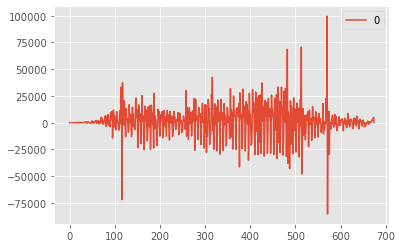

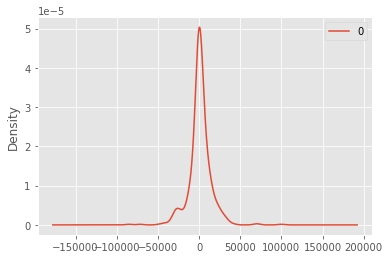

                  0
count    675.000000
mean     960.228555
std    13729.706827
min   -85313.308660
25%    -3129.585046
50%      224.089100
75%     6072.339655
max    99490.215646


In [48]:
series = read_csv('datasets/countries/casos_covid19_brazil.csv', usecols=[1], engine='python')

model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
output = model_fit.forecast()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pandas.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())
autocorrelation_plot(series)
plt.show()

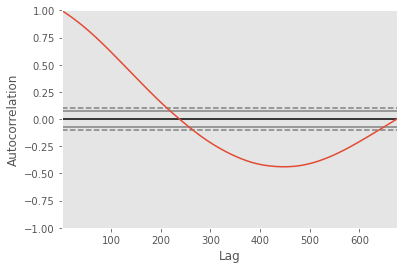

In [50]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()

ValueError: operands could not be broadcast together with shapes (445,1) (230,1) 

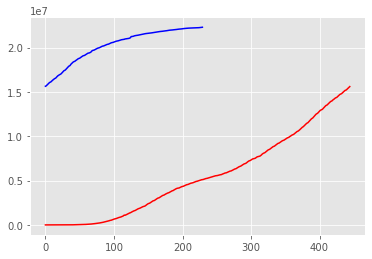

In [62]:
plt.plot(test, color = 'blue')
plt.plot(train, color = 'red')
r = train + test
plt.plot(r, color = 'yellow')

In [64]:
test.plot(figsize=(20,5))

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Test RMSE: 798286.265


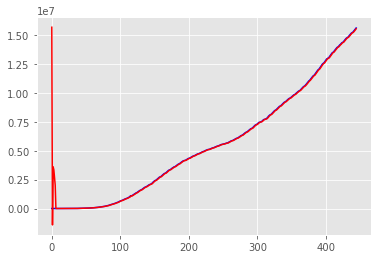

In [56]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
series = read_csv('datasets/countries/casos_covid19_brazil.csv', usecols=[1], engine='python')
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(train)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = train[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(train, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(train, test, color = 'blue')
plt.plot(predictions, color = 'red')
plt.show()

In [39]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
country = ['Brasil', 'Índia', 'Itália', 'EUA'] #Lista de países
# load dataset
for i in range(len(country)):
    for z in range(len(p)):
        if country[i] == 'Brasil':
            series = read_csv('datasets/countries/casos_covid19_brazil.csv', usecols=[1], engine='python')
        if country[i] == 'Índia':
            series = read_csv('datasets/countries/casos_covid19_india.csv', usecols=[1], engine='python')
        if country[i] == 'Itália':
            series = read_csv('datasets/countries/casos_covid19_italy.csv', usecols=[1], engine='python')
        if country[i] == 'EUA':
            series = read_csv('datasets/countries/casos_covid19_us.csv', usecols=[1], engine='python')
        # split into train and test sets
        X = series.values
        size = int(len(X) * 0.66)
        train, test = X[0:size], X[size:len(X)]
        trains = list()
        predictions = list()
        history = [x for x in train]
        # walk-forward validation
        for t in range(len(train)):
            model = ARIMA(history, order=(p[z],d[z],q[z]))
            model_fit = model.fit()
            output = model_fit.forecast()
            yhat = output[0]
            trains.append(yhat)
            obs = train[t]
            history.append(obs)
            #print('predicted=%f, expected=%f' % (yhat, obs))
            # evaluate forecasts
        for t in range(len(test)):
            model = ARIMA(history, order=(p[z],d[z],q[z]))
            model_fit = model.fit()
            output = model_fit.forecast()
            yhat = output[0]
            predictions.append(yhat)
            obs = test[t]
            history.append(obs)
            #print('predicted=%f, expected=%f' % (yhat, obs))
            # evaluate forecasts
        mae = mean_absolute_error(test, predictions)
        rmse_t = math.sqrt(mean_squared_error(train, trains))
        rmse = math.sqrt(mean_squared_error(test, predictions))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [43]:
print(str(model_fit))

In [27]:
#Dicionários
p = [1,2]#,3,4,5]
d = [1,2]#,3,4,5]
q = [1,1]#,3,1,5]
treinos = dict()
treinoss = dict()
sp = dict()
sd = dict()
sq = dict()
sps = dict()
sds = dict()
sqs = dict()
pred = dict()
preds = dict()
outtest = dict()
outtrain = dict()
rmses = dict()
rmses_t = dict()
rmses_ts = dict()
maes = dict()
maess = dict()
trainss = dict()
strainss = dict()
rmsess = {'Brasil':(9**15), 'Índia':(9**15), 'EUA':(9**15),'Itália':(9**15)} #Dicionário de scores de testes
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
country = ['Brasil', 'Índia', 'Itália', 'EUA'] #Lista de países
# load dataset
for i in range(len(country)):
    for z in range(len(p)):
        if country[i] == 'Brasil':
            series = read_csv('datasets/countries/casos_covid19_brazil.csv', usecols=[1], engine='python')
        if country[i] == 'Índia':
            series = read_csv('datasets/countries/casos_covid19_india.csv', usecols=[1], engine='python')
        if country[i] == 'Itália':
            series = read_csv('datasets/countries/casos_covid19_italy.csv', usecols=[1], engine='python')
        if country[i] == 'EUA':
            series = read_csv('datasets/countries/casos_covid19_us.csv', usecols=[1], engine='python')
        # split into train and test sets
        X = series.values
        size = int(len(X) * 0.66)
        train, test = X[0:size], X[size:len(X)]
        trains = list()
        predictions = list()
        history = [x for x in train]
        # walk-forward validation
        for t in range(len(train)):
            model = ARIMA(history, order=(p[z],d[z],q[z]))
            model_fit = model.fit()
            output = model_fit.forecast()
            yhat = output[0]
            trains.append(yhat)
            obs = train[t]
            history.append(obs)
            #print('predicted=%f, expected=%f' % (yhat, obs))
            # evaluate forecasts
        for t in range(len(test)):
            model = ARIMA(history, order=(p[z],d[z],q[z]))
            model_fit = model.fit()
            output = model_fit.forecast()
            yhat = output[0]
            predictions.append(yhat)
            obs = test[t]
            history.append(obs)
            #print('predicted=%f, expected=%f' % (yhat, obs))
            # evaluate forecasts
        mae = mean_absolute_error(test, predictions)
        rmse_t = math.sqrt(mean_squared_error(train, trains))
        rmse = math.sqrt(mean_squared_error(test, predictions))
        maes[country[i]] = mae
        rmses[country[i]] = rmse
        rmses_t[country[i]] = rmse_t
        trainss[country[i]] = trains
        pred[country[i]] = predictions
        outtest[country[i]] = test
        outtrain[country[i]] = train
        sp[country[i]] = p[z]
        sd[country[i]] = d[z]
        sq[country[i]] = q[z]
        if rmses[country[i]] < rmsess[country[i]]:
            sps[country[i]] = p[z]
            sds[country[i]] = d[z]
            sqs[country[i]] = q[z]
            maess[country[i]] = mae
            rmsess[country[i]] = rmse
            rmses_ts[country[i]] = rmse_t
            strainss[country[i]] = trains
            preds[country[i]] = predictions

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\s

In [35]:
for i in range(len(country)):
    pandas.concat([str(strainss[country[i]]),str(preds[country[i]])],axis=1).plot(linewidth=1, figsize=(20,5))

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid


ARIMA - O melhor caso - Brasil



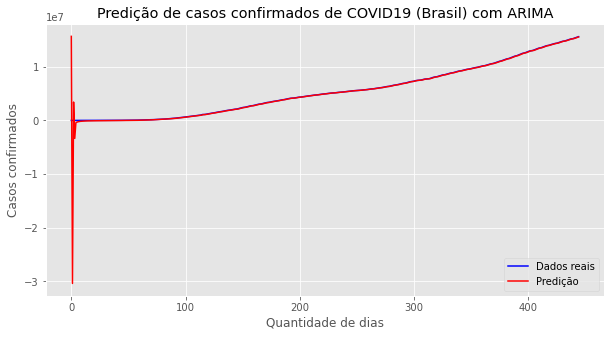

Test RMSE: 1636715.858


p: 2 d: 2 q: 1

ARIMA - O segundo melhor caso - Brasil



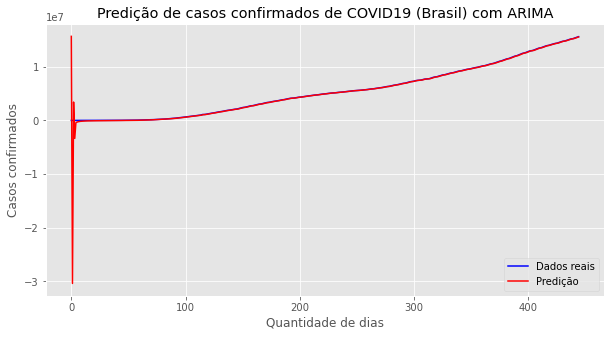

Test RMSE: 1636715.858


p: 2 d: 2 q: 1

ARIMA - O melhor caso - Índia



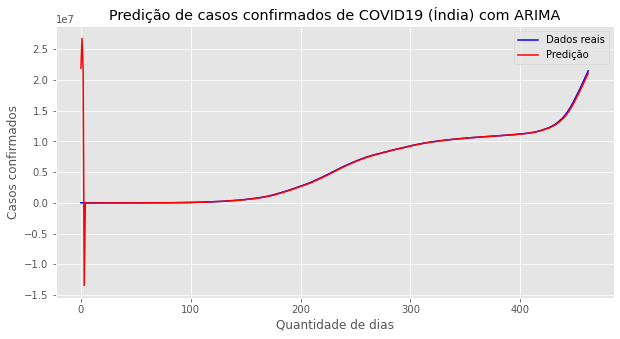

Test RMSE: 1996329.082


p: 2 d: 2 q: 1

ARIMA - O segundo melhor caso - Índia



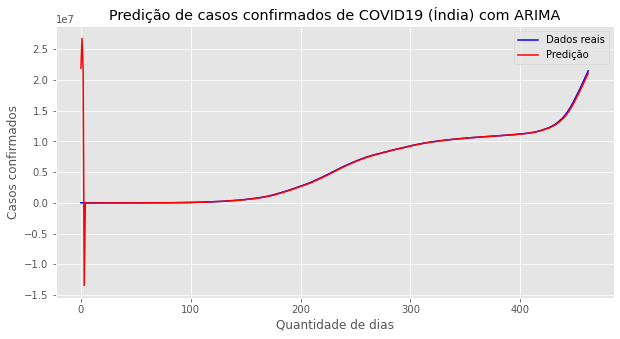

Test RMSE: 1996329.082


p: 2 d: 2 q: 1

ARIMA - O melhor caso - Itália



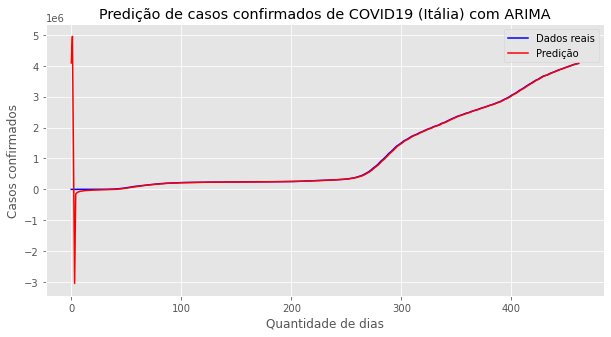

Test RMSE: 334718.550


p: 2 d: 2 q: 1

ARIMA - O segundo melhor caso - Itália



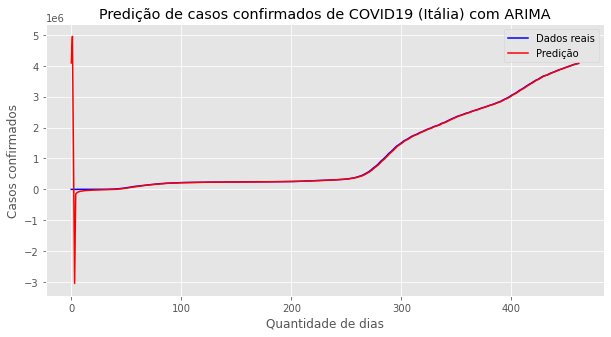

Test RMSE: 334718.550


p: 2 d: 2 q: 1

ARIMA - O melhor caso - EUA



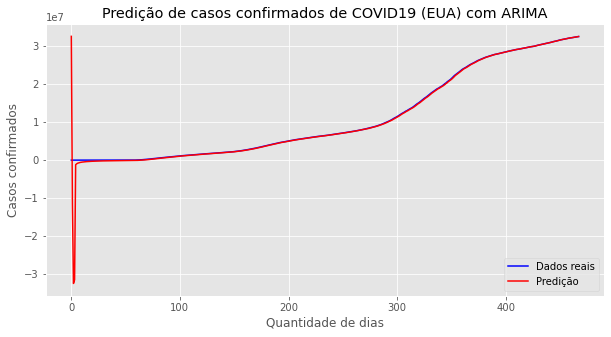

Test RMSE: 2636945.637


p: 2 d: 2 q: 1

ARIMA - O segundo melhor caso - EUA



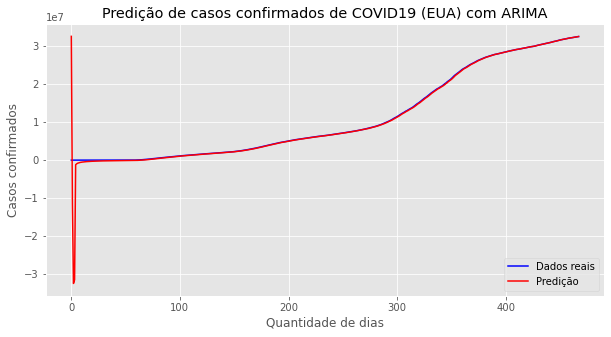

Test RMSE: 2636945.637


p: 2 d: 2 q: 1


In [29]:
#Plotando treinos
for i in range(len(country)):
    print("\nARIMA - O melhor caso - %s\n" %(country[i]))
    plt.figure(figsize=(10,5))
    plt.title('Predição de casos confirmados de COVID19 (%s) com ARIMA - Treino' %(country[i]))
    plt.ylabel('Casos confirmados')
    plt.xlabel('Quantidade de dias')
    plt.plot(outtrain[country[i]], label = 'Dados reais', color = 'blue')
    plt.plot(strainss[country[i]], label = 'Predição', color='red')
    plt.legend()
    plt.show()
    print('Test RMSE: %.3f\n\n' % rmses_ts[country[i]])
    print("p:", sps[country[i]],"d:",sds[country[i]],"q:",sqs[country[i]])
    
    print("\nARIMA - O segundo melhor caso - %s\n" %(country[i]))
    plt.figure(figsize=(10,5))
    plt.title('Predição de casos confirmados de COVID19 (%s) com ARIMA - Treino' %(country[i]))
    plt.ylabel('Casos confirmados')
    plt.xlabel('Quantidade de dias')
    plt.plot(outtrain[country[i]], label = 'Dados reais',color='blue')
    plt.plot(trainss[country[i]], label = 'Predição', color='red')
    plt.legend()
    plt.show()
    print('Test RMSE: %.3f\n\n' % rmses_t[country[i]])
    print("p:", sp[country[i]],"d:",sd[country[i]],"q:",sq[country[i]])


ARIMA - O melhor caso - Brasil



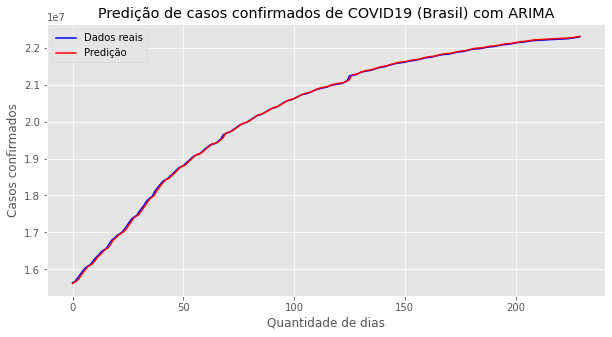

Test RMSE: 25885.513


Test MAE: 19715.093


p: 2 d: 2 q: 1

ARIMA - O segundo melhor caso - Brasil



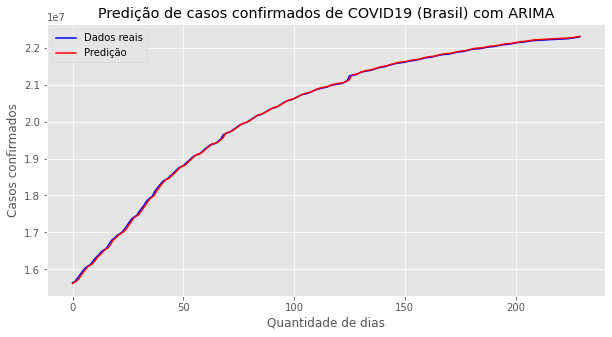

Test RMSE: 25885.513


Test MAE: 19715.093


p: 2 d: 2 q: 1

ARIMA - O melhor caso - Índia



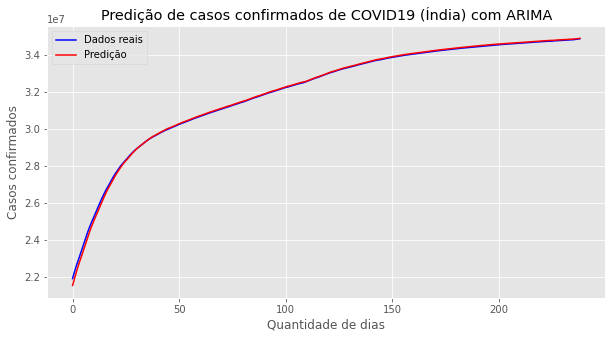

Test RMSE: 80655.872


Test MAE: 51957.790


p: 2 d: 2 q: 1

ARIMA - O segundo melhor caso - Índia



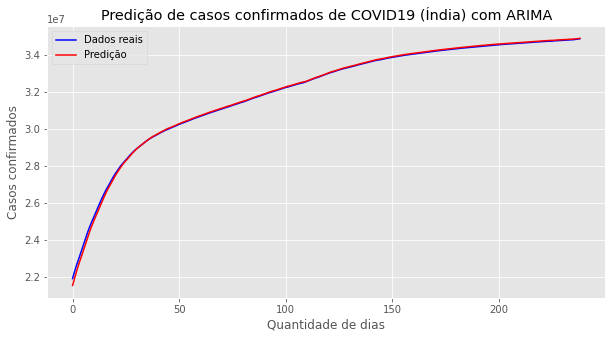

Test RMSE: 80655.872


Test MAE: 51957.790


p: 2 d: 2 q: 1

ARIMA - O melhor caso - Itália



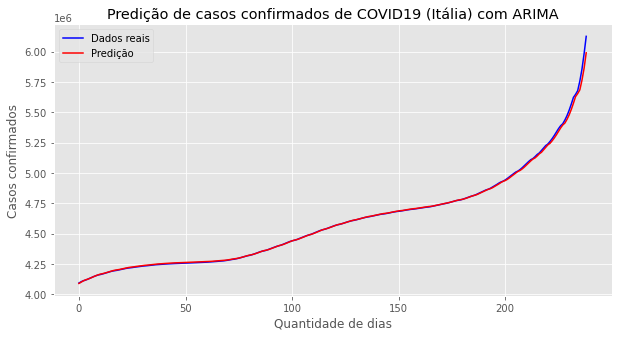

Test RMSE: 15890.236


Test MAE: 6052.963


p: 2 d: 2 q: 1

ARIMA - O segundo melhor caso - Itália



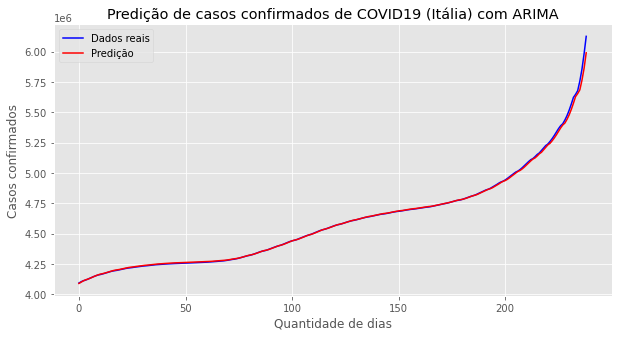

Test RMSE: 15890.236


Test MAE: 6052.963


p: 2 d: 2 q: 1

ARIMA - O melhor caso - EUA



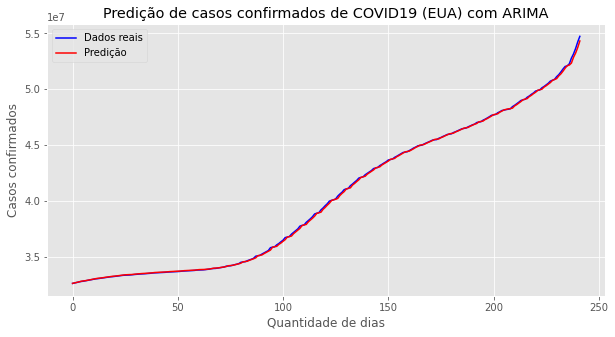

Test RMSE: 93774.996


Test MAE: 59538.752


p: 2 d: 2 q: 1

ARIMA - O segundo melhor caso - EUA



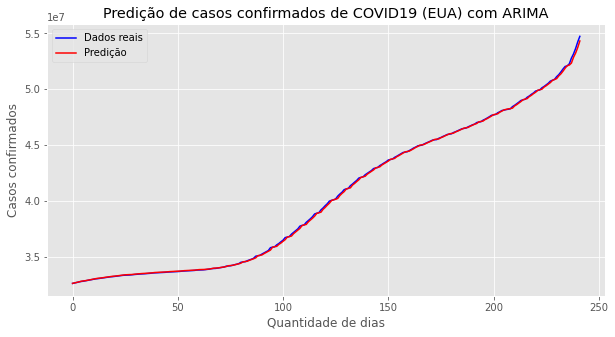

Test RMSE: 93774.996


Test MAE: 59538.752


p: 2 d: 2 q: 1


In [30]:
#Plotando testes
for i in range(len(country)):
    print("\nARIMA - O melhor caso - %s\n" %(country[i]))
    plt.figure(figsize=(10,5))
    plt.title('Predição de casos confirmados de COVID19 (%s) com ARIMA - Teste' %(country[i]))
    plt.ylabel('Casos confirmados')
    plt.xlabel('Quantidade de dias')
    plt.plot(outtest[country[i]], label = 'Dados reais', color = 'blue')
    plt.plot(preds[country[i]], label = 'Predição', color='red')
    plt.legend()
    plt.show()
    print('Test RMSE: %.3f\n\n' % rmsess[country[i]])
    print('Test MAE: %.3f\n\n' % maess[country[i]])
    print("p:", sps[country[i]],"d:",sds[country[i]],"q:",sqs[country[i]])
    
    print("\nARIMA - O segundo melhor caso - %s\n" %(country[i]))
    plt.figure(figsize=(10,5))
    plt.title('Predição de casos confirmados de COVID19 (%s) com ARIMA - Teste' %(country[i]))
    plt.ylabel('Casos confirmados')
    plt.xlabel('Quantidade de dias')
    plt.plot(outtest[country[i]], label = 'Dados reais',color='blue')
    plt.plot(pred[country[i]], label = 'Predição', color='red')
    plt.legend()
    plt.show()
    print('Test RMSE: %.3f\n\n' % rmses[country[i]])
    print('Test MAE: %.3f\n\n' % maes[country[i]])
    print("p:", sp[country[i]],"d:",sd[country[i]],"q:",sq[country[i]])